## Введение
Тема моего проета - **Кинотеатры**

Датасет был выгружен с сайта https://dano.hse.ru/data2022. Он содержит в себе информацию по заказам билетов в кино в 2020 году.

В первую очередь импортируем библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns

Датасет представлен в формате "csv", поэтому импортируем его, использую разделитель по запятым.

In [4]:
data = pd.read_csv('data/cinema_successful_orders.csv', delimiter=';')
data

,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,movie_rating,genre_is_triller,genre_is_military,...,number_of_tickets,places,sales_in_cu,ticket_price_in_cu,cinema_name,cinema_address,cinema_latitude,cinema_longitude,cinema_city,client_id
0,2441412,2020-03-07,2020-03-07,32452,Маленькие женщины,135,12+,"7,7","0,0","0,0",...,2,"ряд 5, место 6, ряд 5, место 5","63,29113924050633","31,645569620253166",Каро 10 Щука,"ул. Щукинская, д. 42",55.809469,37.464571,Москва,12419121665619114461
1,2169133,2020-02-03,2020-02-04,32452,Маленькие женщины,135,12+,"7,7","0,0","0,0",...,4,"ряд 15, место 31, ряд 15, место 32, ряд 15, ме...","189,873417721519","47,46835443037975",Каро 11 Октябрь,"ул. Новый Арбат, д. 24",55.753338,37.587615,Москва,8470824369879098013
2,2187694,2020-02-06,2020-02-06,32452,Маленькие женщины,135,12+,"7,7","0,0","0,0",...,2,"ряд 8, место 8, ряд 8, место 9","47,46835443037975","23,734177215189874",Ретро,"ул. Ленина, д. 41",58.634768,59.783538,Лесной,8691480233029300973
3,2182225,2020-02-05,2020-02-05,32452,Маленькие женщины,135,12+,"7,7","0,0","0,0",...,2,"ряд 8, место 6, ряд 8, место 5","47,46835443037975","23,734177215189874",Каро 9 Континент на Звездной,"ул. Ленсовета, 97",59.832425,30.348585,Санкт-Петербург,16386655971521120416
4,2209967,2020-02-08,2020-02-12,32452,Маленькие женщины,135,12+,"7,7","0,0","0,0",...,3,"ряд 5, место 13, ряд 5, место 12, ряд 5, место 11","132,91139240506328","44,30379746835443",Каро 7 Атриум,"ул. Земляной вал, 33",55.757214,37.658941,Москва,9606322045446303245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525266,2289826,2020-02-17,2020-02-17,36247,Джентльмены,113,18+,"0,0","0,0","0,0",...,2,"ряд 6, место 5, ряд 6, место 6","75,9493670886076","37,9746835443038",Формула Кино Лефортово,"ш. Энтузиастов, 12, корп. 2, ТК «Город Лефортово»",55.747385,37.707076,Москва,15376387967092078428
525267,2284126,2020-02-16,2020-02-16,36247,Джентльмены,113,18+,"0,0","0,0","0,0",...,1,"ряд 11, место 16","77,53164556962025","77,53164556962025",Киномакс-Мозаика,"7-я Кожуховская, 9, ТРК «Мозаика»",55.710639,37.674466,Москва,18201133101467231081
525268,2371205,2020-02-25,2020-02-25,36247,Джентльмены,113,18+,"0,0","0,0","0,0",...,2,"ряд 9, место 15, ряд 9, место 16","56,962025316455694","28,481012658227847",Балтика,"Сходненская, 56, ТРЦ «Калейдоскоп»",55.850661,37.444295,Москва,10753400401096512686
525269,2371601,2020-02-25,2020-02-25,36247,Джентльмены,113,18+,"0,0","0,0","0,0",...,2,"ряд 3, место 9, ряд 3, место 8","47,46835443037975","23,734177215189874",Синема Парк Гранд Каньон,"просп. Энгельса, 154, «Гранд Каньон»",60.058087,30.334233,Санкт-Петербург,7148845257742510639


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525271 entries, 0 to 525270
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               525271 non-null  int64  
 1   creation_date          525271 non-null  object 
 2   session_date           525271 non-null  object 
 3   movie_id               525271 non-null  int64  
 4   movie_name             525271 non-null  object 
 5   movie_duration         521989 non-null  object 
 6   movie_age_restriction  523648 non-null  object 
 7   movie_rating           525271 non-null  object 
 8   genre_is_triller       525188 non-null  object 
 9   genre_is_military      525188 non-null  object 
 10  genre_is_action        525188 non-null  object 
 11  genre_is_biographical  525188 non-null  object 
 12  genre_is_fairy_tale    525188 non-null  object 
 13  genre_is_science       525188 non-null  object 
 14  genre_is_fantasy       525188 non-nu

In [6]:
Moscow_cinemas = data[data["cinema_city"] == 'Москва'] #Выберем только те строчки, которые содержат в себе значение "Москва"
Moscow_cinemas_new = Moscow_cinemas[["cinema_name", "cinema_latitude", "cinema_longitude"]]
Moscow_cinemas_info = Moscow_cinemas_new.drop_duplicates()
Moscow_cinemas_info.reset_index(drop=True, inplace=True)
Moscow_cinemas_info

,cinema_name,cinema_latitude,cinema_longitude
0,Каро 10 Щука,55.809469,37.464571
1,Каро 11 Октябрь,55.753338,37.587615
2,Каро 7 Атриум,55.757214,37.658941
3,Люксор Весна,55.913178,37.585763
4,Каро 8 Южное Бутово,55.548599,37.542392
...,...,...,...
169,Prada 3D (Балашиха),55.797806,37.938478
170,Синема Стар Дмитровка,55.909291,37.540605
171,Бульвар,55.574814,37.580066
172,Pushka в ТРК Ключевой,55.639959,37.758204


In [10]:
lat = Moscow_cinemas_info['cinema_latitude']
lon = Moscow_cinemas_info['cinema_longitude']
name = Moscow_cinemas_info['cinema_name']

map = folium.Map(location=(55.753215, 37.622504), zoom_start=11) #Установим начальную локацию (центр Москвы), которая будет изначально открываться

for lat, lon, name in zip(lat, lon, name):
    folium.Marker(location=[lat, lon], popup=str(name), icon=folium.Icon(color = 'gray')).add_to(map)

map.save("map1.html")
map

In [22]:
data.sort_values('session_date', inplace=True)
dates = data[["session_date", "number_of_tickets"]]
dates.reset_index(drop=True, inplace=True)
dates_2020 = dates.groupby(['session_date']).agg({'number_of_tickets': 'sum'}).reset_index()
dates_2020

,session_date,number_of_tickets
0,2020-01-01,15153
1,2020-01-02,23154
2,2020-01-03,20951
3,2020-01-04,19073
4,2020-01-05,18066
...,...,...
236,2020-11-13,2
237,2020-11-14,6
238,2020-11-18,1
239,2020-11-21,2


Text(0.5, 1.0, 'График посещаемости кинотеатров за 2020 год')

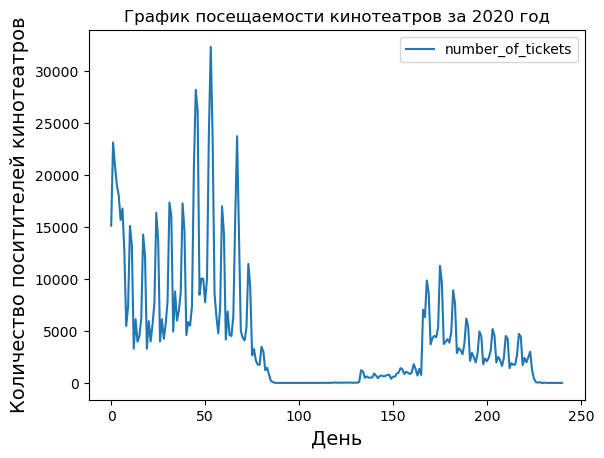

In [72]:
dates_2020.plot()
plt.xlabel('День', fontsize=14)
plt.ylabel('Количество поситителей кинотеатров', fontsize=14)
plt.title('График посещаемости кинотеатров за 2020 год')

In [76]:
genre = data[["movie_name", "genre_is_triller", "genre_is_military", "genre_is_action", "genre_is_biographical", "genre_is_fairy_tale", "genre_is_science", "genre_is_fantasy", "genre_is_historical", "genre_is_drama", "genre_is_animation", "genre_is_cartoon", "genre_is_documentary", "genre_is_adventure", "genre_is_fiction", "genre_is_childish", "genre_is_horror", "genre_is_humor", "genre_is_western", "genre_is_noir", "genre_is_detective", "genre_is_biography", "genre_is_criminal", "genre_is_tragicomedy", "genre_is_biopic", "genre_is_mystic", "genre_is_family", "genre_is_comedy", "genre_is_arthouse"]]
genre_fixed = genre.drop_duplicates()
genre_fixed.reset_index(drop=True, inplace=True)
genre_fixed

,movie_name,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fairy_tale,genre_is_science,genre_is_fantasy,genre_is_historical,genre_is_drama,...,genre_is_noir,genre_is_detective,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse
0,Союз спасения,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0"
1,Холоп,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0"
2,Иван Царевич и Серый Волк 4,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0"
3,Союз спасения,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0"
4,Полицейский с Рублевки. Новогодний Беспредел 2,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","1,0","0,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,Цой,"0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","1,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0"
1425,Завтрак у Тиффани,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",...,"0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0"
1426,RIFF: Итальянские каникулы,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0"
1427,Заводной апельсин,"1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0"


In [77]:
genre_only = genre_fixed.drop('movie_name', axis=1)
genre_only = genre_only.stack().str.replace(',','.').unstack()
genre_only = genre_only.astype('float') #Снчала меняем тип с object на float
genre_only = genre_only.astype('int32') #Затем меняем на тип int32

In [78]:
genre_only.loc['Total']= genre_only.sum(numeric_only=True, axis=0)
genre_only

,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fairy_tale,genre_is_science,genre_is_fantasy,genre_is_historical,genre_is_drama,genre_is_animation,...,genre_is_noir,genre_is_detective,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1427,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
count_genre = genre_only.loc['Total']
print(count_genre)

genre_is_triller         138
genre_is_military         18
genre_is_action           85
genre_is_biographical     40
genre_is_fairy_tale        0
genre_is_science          18
genre_is_fantasy          63
genre_is_historical       40
genre_is_drama           414
genre_is_animation         0
genre_is_cartoon         121
genre_is_documentary     244
genre_is_adventure       134
genre_is_fiction          70
genre_is_childish         83
genre_is_horror           90
genre_is_humor             0
genre_is_western           5
genre_is_noir              1
genre_is_detective        33
genre_is_biography        33
genre_is_criminal         60
genre_is_tragicomedy      40
genre_is_biopic            9
genre_is_mystic           13
genre_is_family          185
genre_is_comedy          235
genre_is_arthouse          9
Name: Total, dtype: int64


Text(0.5, 1.0, 'Диаграмма популярности жанров')

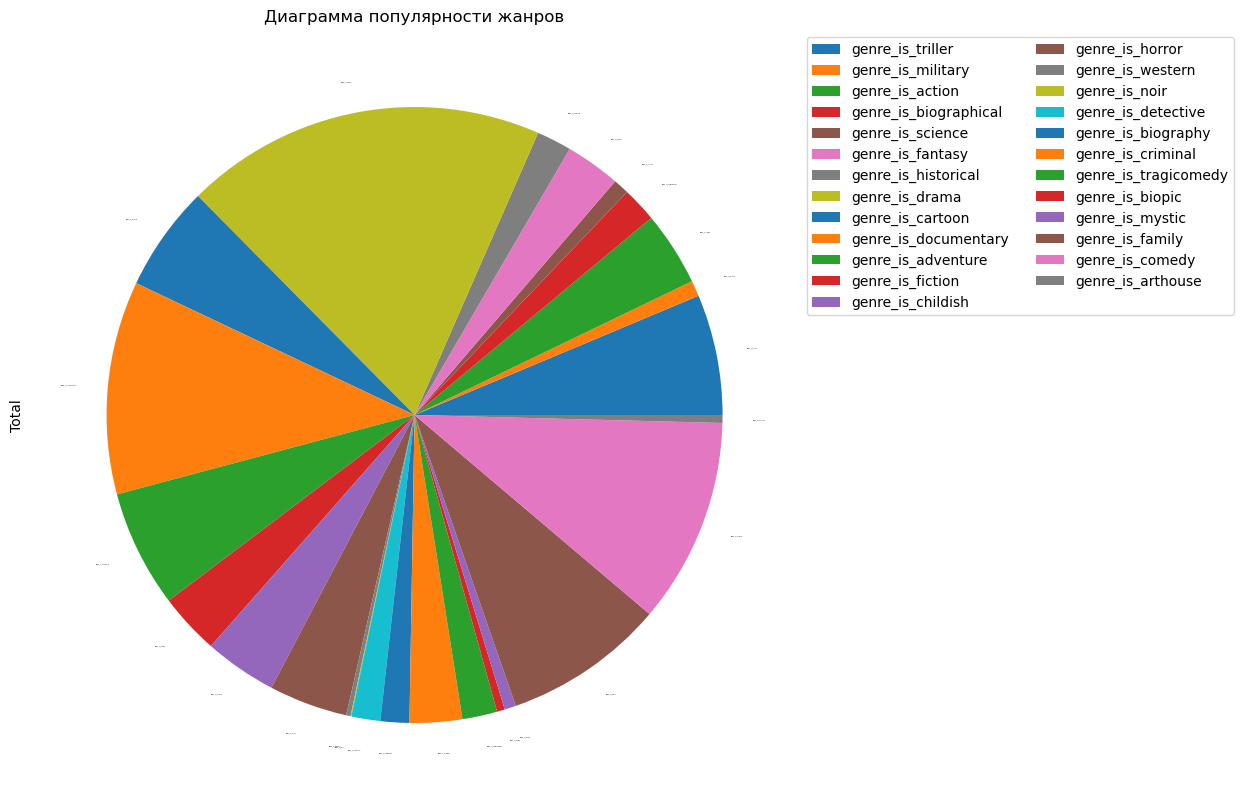

In [84]:
count_genre.plot.pie(fontsize=0, figsize=(10, 10))
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), ncols=2)
plt.title('Диаграмма популярности жанров')

Text(0.5, 1.0, 'Диаграмма соотношения заказов с разным количеством билетов в них')

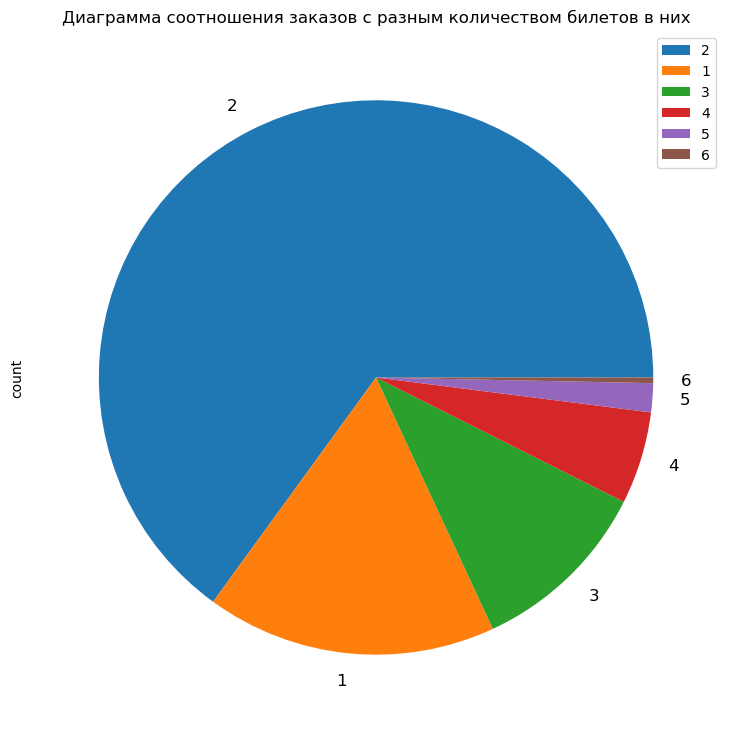

In [86]:
tickets = data['number_of_tickets'].value_counts()
tickets.plot.pie(fontsize=12, figsize=(9, 9))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Диаграмма соотношения заказов с разным количеством билетов в них')

In [88]:
seats = data[["number_of_tickets", "places"]]
seats.reset_index(drop=True, inplace=True)
seats

,number_of_tickets,places
0,2,"ряд 8, место 8, ряд 8, место 7"
1,2,"ряд 16, место 12, ряд 16, место 11"
2,1,"ряд 6, место 10"
3,3,"ряд 6, место 11, ряд 6, место 9, ряд 6, место 10"
4,1,"ряд 3, место 7"
...,...,...
525266,2,"ряд 6, место 14, ряд 6, место 16"
525267,2,"ряд 3, место 24, ряд 3, место 26"
525268,1,"ряд 12, место 42"
525269,2,"ряд 12, место 21, ряд 12, место 22"


In [90]:
seats_1 = seats[seats["number_of_tickets"] == 1].copy() # выбераем только заказы с 1 билетом
seats_1.reset_index(drop=True, inplace=True)
seats_1["places"] = seats_1["places"].apply(str).str.title()
seats_1["places"] = seats_1["places"].apply(str).str.replace(',', '')
seats_1[["Ряд", "Номер ряда", "Место", "Номер места"]] = seats_1["places"].apply(str).str.split(' ', n=3, expand=True)
seats_1_main = seats_1[['Номер ряда', 'Номер места']]
seats_1_main

,Номер ряда,Номер места
0,6,10
1,3,7
2,11,16
3,8,15
4,9,11
...,...,...
88895,1,12
88896,4,2
88897,5,25
88898,12,42


In [92]:
seats_2 = seats[seats["number_of_tickets"] == 2].copy() # выбераем только заказы с 2 билетами
seats_2.reset_index(drop=True, inplace=True)
seats_2["places"] = seats_2["places"].apply(str).str.title()
seats_2["places"] = seats_2["places"].apply(str).str.replace(',', '')
seats_2[["Ряд", "Номер ряда", "Место", "Номер места", "Ряд2", "Номер ряда2", "Место2", "Номер места2"]] = seats_2["places"].apply(str).str.split(' ', n=7, expand=True)
seats_main_2 = seats_2[["Номер ряда", "Номер места", "Номер ряда2", "Номер места2"]]
seats_main_2_first = seats_main_2[["Номер ряда", "Номер места"]]
seats_main_2_second = seats_main_2[["Номер ряда2", "Номер места2"]]
seats_main_2_second = seats_main_2_second.rename(columns={'Номер ряда2': 'Номер ряда', 'Номер места2': 'Номер места'})
seats_1_2 = pd.concat([seats_1_main, seats_main_2_first, seats_main_2_second], ignore_index=True)
seats_1_2

,Номер ряда,Номер места
0,6,10
1,3,7
2,11,16
3,8,15
4,9,11
...,...,...
771699,6,5
771700,9,38
771701,6,16
771702,3,26


In [93]:
seats_3 = seats[seats["number_of_tickets"] == 3].copy()  # выбераем только заказы с 3 билетами
seats_3.reset_index(drop=True, inplace=True)
seats_3["places"] = seats_3["places"].apply(str).str.title()
seats_3["places"] = seats_3["places"].apply(str).str.replace(',', '')
seats_3[["Ряд", "Номер ряда", "Место", "Номер места", "Ряд2", "Номер ряда2", "Место2", "Номер места2", "Ряд3", "Номер ряда3", "Место3", "Номер места3"]] = seats_3["places"].apply(str).str.split(' ', n=11, expand=True)
seats_main_3 = seats_3[["Номер ряда", "Номер места", "Номер ряда2", "Номер места2", "Номер ряда3", "Номер места3"]]
seats_main_3_first = seats_main_3[["Номер ряда", "Номер места"]]
seats_main_3_second = seats_main_3[["Номер ряда2", "Номер места2"]]
seats_main_3_third = seats_main_3[["Номер ряда3", "Номер места3"]]
seats_main_3_second = seats_main_3_second.rename(columns={'Номер ряда2': 'Номер ряда', 'Номер места2': 'Номер места'})
seats_main_3_third = seats_main_3_third.rename(columns={'Номер ряда3': 'Номер ряда', 'Номер места3': 'Номер места'})
seats_1_2_3 = pd.concat([seats_1_2, seats_main_3_first, seats_main_3_second, seats_main_3_third], ignore_index=True)
seats_1_2_3

,Номер ряда,Номер места
0,6,10
1,3,7
2,11,16
3,8,15
4,9,11
...,...,...
939885,4,8
939886,2,4
939887,8,14
939888,7,5


In [96]:
seats_4 = seats[seats["number_of_tickets"] == 4].copy()  # выбераем только заказы с 4 билетами
seats_4.reset_index(drop=True, inplace=True)
seats_4["places"] = seats_4["places"].apply(str).str.title()
seats_4["places"] = seats_4["places"].apply(str).str.replace(',', '')
seats_4[["Ряд", "Номер ряда", "Место", "Номер места", "Ряд2", "Номер ряда2", "Место2", "Номер места2", "Ряд3", "Номер ряда3", "Место3", "Номер места3", "Ряд4", "Номер ряда4", "Место4", "Номер места4"]] = seats_4["places"].apply(str).str.split(' ', n=15, expand=True)
seats_main_4 = seats_4[["Номер ряда", "Номер места", "Номер ряда2", "Номер места2", "Номер ряда3", "Номер места3", "Номер ряда4", "Номер места4"]]
seats_main_4_first = seats_main_4[["Номер ряда", "Номер места"]]
seats_main_4_second = seats_main_4[["Номер ряда2", "Номер места2"]]
seats_main_4_third = seats_main_4[["Номер ряда3", "Номер места3"]]
seats_main_4_fourth = seats_main_4[["Номер ряда4", "Номер места4"]]
seats_main_4_second = seats_main_4_second.rename(columns={'Номер ряда2': 'Номер ряда', 'Номер места2': 'Номер места'})
seats_main_4_third = seats_main_4_third.rename(columns={'Номер ряда3': 'Номер ряда', 'Номер места3': 'Номер места'})
seats_main_4_fourth = seats_main_4_fourth.rename(columns={'Номер ряда4': 'Номер ряда', 'Номер места4': 'Номер места'})
seats_1_2_3_4 = pd.concat([seats_1_2_3, seats_main_4_first, seats_main_4_second, seats_main_4_third, seats_main_4_fourth], ignore_index=True)
seats_1_2_3_4

,Номер ряда,Номер места
0,6,10
1,3,7
2,11,16
3,8,15
4,9,11
...,...,...
1053253,4,4
1053254,5,8
1053255,5,8
1053256,11,15


In [98]:
seats_5 = seats[seats["number_of_tickets"] == 5].copy()  # выбераем только заказы с 5 билетами
seats_5.reset_index(drop=True, inplace=True)
seats_5["places"] = seats_5["places"].apply(str).str.title()
seats_5["places"] = seats_5["places"].apply(str).str.replace(',', '')
seats_5[["Ряд", "Номер ряда", "Место", "Номер места", "Ряд2", "Номер ряда2", "Место2", "Номер места2", "Ряд3", "Номер ряда3", "Место3", "Номер места3", "Ряд4", "Номер ряда4", "Место4", "Номер места4", "Ряд5", "Номер ряда5", "Место5", "Номер места5"]] = seats_5["places"].apply(str).str.split(' ', n=19, expand=True)
seats_main_5 = seats_5[["Номер ряда", "Номер места", "Номер ряда2", "Номер места2", "Номер ряда3", "Номер места3", "Номер ряда4", "Номер места4", "Номер ряда5", "Номер места5"]]
seats_main_5_first = seats_main_5[["Номер ряда", "Номер места"]]
seats_main_5_second = seats_main_5[["Номер ряда2", "Номер места2"]]
seats_main_5_third = seats_main_5[["Номер ряда3", "Номер места3"]]
seats_main_5_fourth = seats_main_5[["Номер ряда4", "Номер места4"]]
seats_main_5_fifth = seats_main_5[["Номер ряда5", "Номер места5"]]
seats_main_5_second = seats_main_5_second.rename(columns={'Номер ряда2': 'Номер ряда', 'Номер места2': 'Номер места'})
seats_main_5_third = seats_main_5_third.rename(columns={'Номер ряда3': 'Номер ряда', 'Номер места3': 'Номер места'})
seats_main_5_fourth = seats_main_5_fourth.rename(columns={'Номер ряда4': 'Номер ряда', 'Номер места4': 'Номер места'})
seats_main_5_fifth = seats_main_5_fifth.rename(columns={'Номер ряда5': 'Номер ряда', 'Номер места5': 'Номер места'})
seats_1_2_3_4_5 = pd.concat([seats_1_2_3_4, seats_main_5_first, seats_main_5_second, seats_main_5_third, seats_main_5_fourth, seats_main_5_fifth], ignore_index=True)
seats_1_2_3_4_5

,Номер ряда,Номер места
0,6,10
1,3,7
2,11,16
3,8,15
4,9,11
...,...,...
1097528,6,6
1097529,4,7
1097530,6,9
1097531,8,9


In [100]:
seats_6 = seats[seats["number_of_tickets"] == 6].copy()  # выбераем только заказы с 6 билетами
seats_6.reset_index(drop=True, inplace=True)
seats_6["places"] = seats_6["places"].apply(str).str.title()
seats_6["places"] = seats_6["places"].apply(str).str.replace(',', '')
seats_6[["Ряд", "Номер ряда", "Место", "Номер места", "Ряд2", "Номер ряда2", "Место2", "Номер места2", "Ряд3", "Номер ряда3", "Место3", "Номер места3", "Ряд4", "Номер ряда4", "Место4", "Номер места4", "Ряд5", "Номер ряда5", "Место5", "Номер места5", "Ряд6", "Номер ряда6", "Место6", "Номер места6"]] = seats_6["places"].apply(str).str.split(' ', n=23, expand=True)
seats_main_6 = seats_6[["Номер ряда", "Номер места", "Номер ряда2", "Номер места2", "Номер ряда3", "Номер места3", "Номер ряда4", "Номер места4", "Номер ряда5", "Номер места5", "Номер ряда6", "Номер места6"]]
seats_main_6_first = seats_main_6[["Номер ряда", "Номер места"]]
seats_main_6_second = seats_main_6[["Номер ряда2", "Номер места2"]]
seats_main_6_third = seats_main_6[["Номер ряда3", "Номер места3"]]
seats_main_6_fourth = seats_main_6[["Номер ряда4", "Номер места4"]]
seats_main_6_fifth = seats_main_6[["Номер ряда5", "Номер места5"]]
seats_main_6_sixth = seats_main_6[["Номер ряда6", "Номер места6"]]
seats_main_6_second = seats_main_6_second.rename(columns={'Номер ряда2': 'Номер ряда', 'Номер места2': 'Номер места'})
seats_main_6_third = seats_main_6_third.rename(columns={'Номер ряда3': 'Номер ряда', 'Номер места3': 'Номер места'})
seats_main_6_fourth = seats_main_6_fourth.rename(columns={'Номер ряда4': 'Номер ряда', 'Номер места4': 'Номер места'})
seats_main_6_fifth = seats_main_6_fifth.rename(columns={'Номер ряда5': 'Номер ряда', 'Номер места5': 'Номер места'})
seats_main_6_sixth = seats_main_6_sixth.rename(columns={'Номер ряда6': 'Номер ряда', 'Номер места6': 'Номер места'})
seats_1_2_3_4_5_6 = pd.concat([seats_1_2_3_4_5, seats_main_6_first, seats_main_6_second, seats_main_6_third, seats_main_6_fourth, seats_main_6_fifth, seats_main_6_sixth], ignore_index=True)
seats_1_2_3_4_5_6

,Номер ряда,Номер места
0,6,10
1,3,7
2,11,16
3,8,15
4,9,11
...,...,...
1107788,8,5
1107789,1,12
1107790,4,7
1107791,8,11


In [102]:
unique_values = seats_1_2_3_4_5_6['Номер ряда'].unique()
print(unique_values)

['6' '3' '11' '8' '9' '7' '2' '4' '1' '5' '10' '12' '13' '15' '14' '17'
 'Балкон' '16' '19' 'Балкон2' '18' '24' 'Vip' '21' 'Балкон3' '20' 'Б4'
 'Б1' '0' '23' '22' 'Б3' 'Балкон1' '-' 'Б5' 'Б2' 'Б7' 'Б6' 'Б8' 'Д7' 'Д3'
 'Д6' '26' 'Д5' 'Д1' 'Д4' '16A' 'Д2' '1И' 'Диваны' 'Ряд' '3.1' '6.1' '17B'
 '4.1' '6.2' '5.2' '4.2' 'Место']


In [104]:
# оставляем только те ряды, которые встречаются практически в каждом кинотеатре
fixed_seats = seats_1_2_3_4_5_6[seats_1_2_3_4_5_6['Номер ряда'].isin(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10",
"11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25"])]  
fixed_seats

,Номер ряда,Номер места
0,6,10
1,3,7
2,11,16
3,8,15
4,9,11
...,...,...
1107788,8,5
1107789,1,12
1107790,4,7
1107791,8,11


In [106]:
unique_values = fixed_seats['Номер ряда'].unique()
print(unique_values)

['6' '3' '11' '8' '9' '7' '2' '4' '1' '5' '10' '12' '13' '15' '14' '17'
 '16' '19' '18' '24' '21' '20' '23' '22']


In [108]:
unique_values = fixed_seats['Номер места'].unique()
print(unique_values)

['10' '7' '16' '15' '11' '29' '9' '5' '3' '14' '13' '2' '12' '18' '4' '20'
 '1' '6' '19' '8' '22' '17' '21' '23' '25' '26' '24' '36' '44' '33' '34'
 '40' '30' '27' '11-12' '42' '31' '3А' '28' '37' '32' '35' '13-14' '81'
 'Место 1' '38' '43' '45' '47' '59' '39' '61' '7-8' '46' '52' '49' '50'
 '41' 'Место 5' '57' '55' '5-6' 'И-2' 'Место 4' '3-4' 'Инв 2' '51' '9-10'
 'Место 6' '62' '101' '53' '48' '1А' '72' '63' '73' '1-2' '2.1' '6.1' '56'
 'E' 'G' 'V4' '1Б' '7.2' 'B' '3Б' '4Б' 'A' '5.1' '2А' 'Место' '6.2' '5А'
 '8А' '3.1' '2Б' '4А' '6А' '5Б' 'Vip' '5.2' '7Б' '54' '8.1' '60' '58'
 '1.2' '4.1' '6Б' '7.1' '4.2' '9.1' '09' '71' '8.2' '9А' '3.2' 'Б2' 'Инв'
 'D' '11Б' '16Б' '2.2' '8Б' '0' '7А' '1.1' '9.2' '9Б' 'Б1' 'V3' 'C' '11А'
 '16А' '1В' 'Балкон 2 Место 14' '1 Vip Место 5' '1 Vip Место 2'
 'Балкон 3 Место 17' '1 Место 11' '66' 'V11' '88' 'V7' '99' 'V9' 'Балкон'
 '77' '00' 'Ряд 1 Место 6 Vip' 'V5' 'Ряд 1 Место 2'
 'Место 3.1 Ряд 7 Диваны Место 2.2']


In [110]:
# оставляем только те места, которые встречаются практически в каждом кинотеатре
fixed_seats_new = fixed_seats[fixed_seats['Номер места'].isin(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10",
"11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25"])]
fixed_seats_new

,Номер ряда,Номер места
0,6,10
1,3,7
2,11,16
3,8,15
4,9,11
...,...,...
1107788,8,5
1107789,1,12
1107790,4,7
1107791,8,11


In [112]:
unique_values = fixed_seats_new['Номер места'].unique()
print(unique_values)

['10' '7' '16' '15' '11' '9' '5' '3' '14' '13' '2' '12' '18' '4' '20' '1'
 '6' '19' '8' '22' '17' '21' '23' '25' '24']


In [114]:
seats_new_type = fixed_seats_new.astype(int)
seats_new_type.dtypes

Номер ряда     int32
Номер места    int32
dtype: object

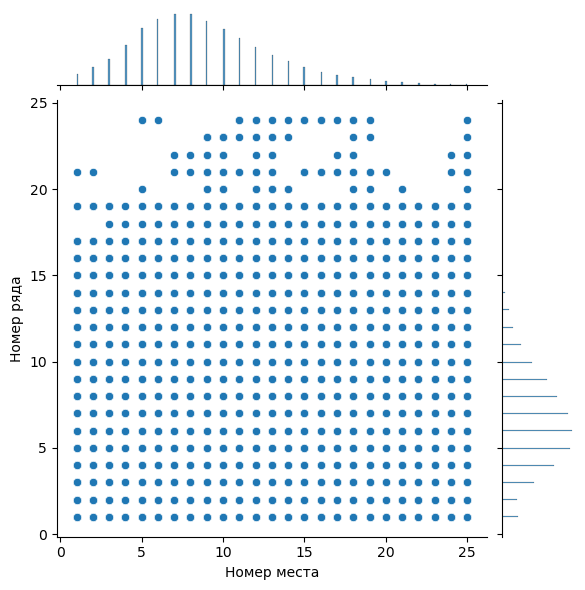

In [150]:
g = sns.jointplot(data=data, x=seats_new_type["Номер места"], y=seats_new_type["Номер ряда"], kind='scatter')

## Выводы
1. На графике посещаемости кинотеатров видно, что в течение нескольких месяцев они были закрыты. С 23 марта в России не работали не только кинотеатры, но и концертные площадки, театры и другие общественные пространства. Они возобновили свою деятельность только с 1 августа, при этом залы могли быть заполнены только на 50%. Этот период хорошо виден на графике.
2. В 2020 году самыми популярными жанрами кино были драма, комедия и документальное кино. Артхаус оказался наименее востребованным.
3. Большинство людей покупали по два билета в одном заказе.
4. Наиболее популярными местами в кинотеатрах были 6 ряд, 7 и 8 места.

**Я надеюсь, что моё исследование было вам интересно, и вы узнали много нового!**

## Список авторов

Евсеева Олеся - единственный и неповторимый автор! ✨